Importing the Database and the required Liberaries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iris = sns.load_dataset('iris')

**Question 1**

Estimate the covariance matrix of the 4 attributes.

In [ ]:
features = iris.drop('species', axis=1)
standardized = iris.drop('species', axis=1)
for i in range(4):
  c = features.iloc[:,i]
  c = (c-c.mean())/c.std()
  standardized.iloc[:,i] = c
def q(x, y):
    cov_xy  = np.sum(x*y)/(len(x)-1)
    return cov_xy

cov_matrix = np.zeros((len(standardized.columns), len(standardized.columns)))
for i in range(len(standardized.columns)):
    for j in range(len(standardized.columns)):
        cov_ij = q(standardized.iloc[:, i], standardized.iloc[:, j])
        cov_matrix[i, j] = cov_ij
print(cov_matrix)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


**Question 2**

Estimate the four principal components of the data.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Eigenvalues:\n", sorted_eigenvalues)
print("Eigenvectors:\n", sorted_eigenvectors)

Eigenvalues:
 [2.91849782 0.91403047 0.14675688 0.02071484]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


**Question 3**

Perform dimensionality reduction using PCA to reduce 150 data points into two dimensions and three dimensions.


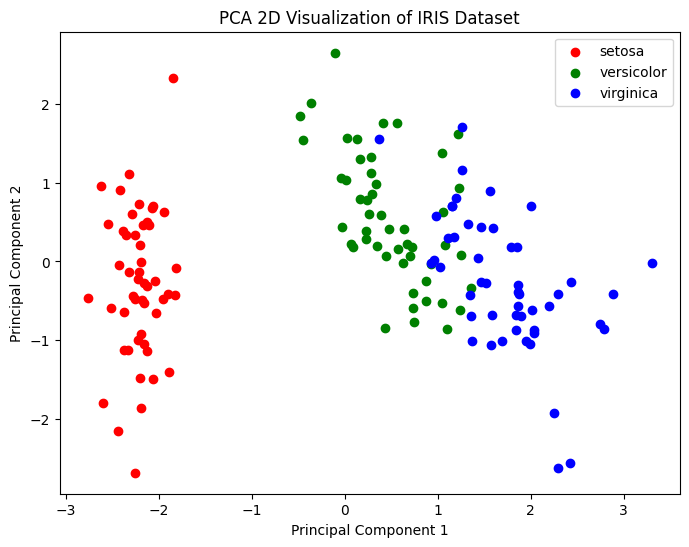

In [ ]:
pca_2d = np.dot(standardized, sorted_eigenvectors[:, :2])
pca_3d = np.dot(standardized, sorted_eigenvectors[:, :3])

plt.figure(figsize=(8, 6))
for species, color in zip(iris['species'].unique(), ['r', 'g', 'b']):
    mask = iris['species'] == species
    plt.scatter(pca_2d[mask, 0], pca_2d[mask, 1], color=color, label=species)
plt.title('PCA 2D Visualization of IRIS Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

**Question 4**

Visualize the reduced dimension 150 data points in 2D and 3D while giving different colors to reduced data points of diff different species.

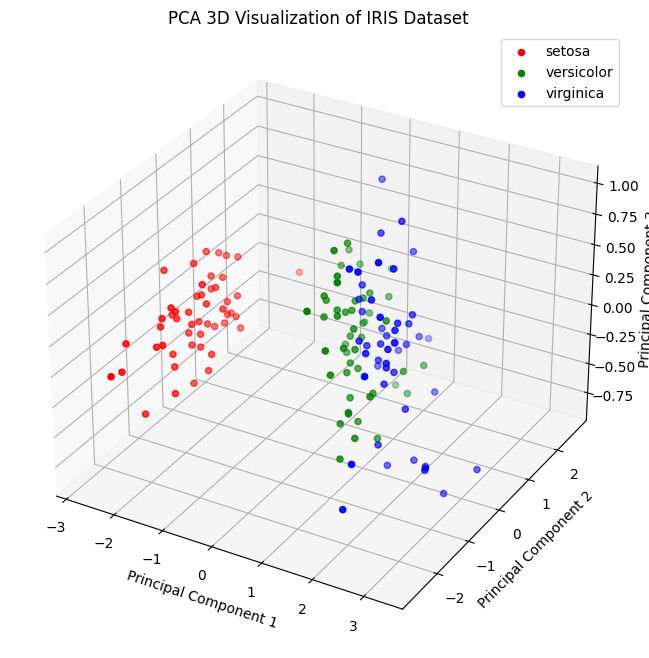

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for species, color in zip(iris['species'].unique(), ['r', 'g', 'b']):
    mask = iris['species'] == species
    ax.scatter(pca_3d[mask, 0], pca_3d[mask, 1], pca_3d[mask, 2], color=color, label=species)
ax.set_title('PCA 3D Visualization of IRIS Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()